In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)# To see all the columns of a dataframe
pd.set_option('display.max_rows', None)

In [2]:
# Function to reduce the memory usage of various Dataframes
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
       
        1. Iterate over every column
        2. Determine if the column is numeric
        3. Determine if the column can be represented by an integer
        4. Find the min and the max value
        5. Determine and apply the smallest datatype that can fit the range of values

    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


In [3]:
def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [4]:
# Reading the Application Data
df_app = import_data('New_application_train.csv')

Memory usage of dataframe is 168.92 MB
Memory usage after optimization is: 31.68 MB
Decreased by 81.2%


In [6]:
df_app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262939,0.139404,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622070,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.556152,0.729492,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008018,-19005,-3039,-9832.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650391,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028656,-19932,-3038,-4312.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322754,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# Reading the merged bureau dataset
bu_bal = import_data('bureau&bu_bal_final.csv')

Memory usage of dataframe is 42.00 MB
Memory usage after optimization is: 12.54 MB
Decreased by 70.1%


In [7]:
bu_bal.head()

,SK_ID_CURR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card
0,100001,-735.000,0.0,82.4375,0.0,207623.578125,85240.929688,0.0,-93.12500,7,-11.789062,0.336670,0.441162,0.214600,0.428467,0.571289,1.000000,0.000000
1,100002,-874.000,0.0,-349.0000,0.0,108131.945312,49156.199219,0.0,-500.00000,8,-21.875000,0.406982,0.175415,0.161987,0.250000,0.750000,0.500000,0.500000
2,100003,-1401.000,0.0,-544.5000,0.0,254350.125000,0.000000,0.0,-816.00000,4,NaN,NaN,NaN,NaN,0.250000,0.750000,0.500000,0.500000
3,100004,-867.000,0.0,-488.5000,0.0,94518.898438,0.000000,0.0,-532.00000,2,NaN,NaN,NaN,NaN,0.000000,1.000000,1.000000,0.000000
4,100005,-190.625,0.0,439.2500,0.0,219042.000000,189469.500000,0.0,-54.34375,3,-3.000000,0.734863,0.128174,0.136719,0.666504,0.333252,0.666504,0.333252


## Merging various Datasets with main application dataset

### Merging application & bureau datasets.

In [8]:
# Merging the application & bureau Datasets
data = df_app.merge(bu_bal, on='SK_ID_CURR', how='left')

In [9]:
# Examining merged application & bureau datasets
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018799,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262939,0.139404,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,-874.0,0.0,-349.0,0.0,108131.945312,49156.199219,0.0,-500.0,8.0,-21.875,0.406982,0.175415,0.161987,0.25,0.75,0.5,0.5
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003542,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622070,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1401.0,0.0,-544.5,0.0,254350.125000,0.000000,0.0,-816.0,4.0,NaN,NaN,NaN,NaN,0.25,0.75,0.5,0.5
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010033,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.556152,0.729492,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-867.0,0.0,-488.5,0.0,94518.898438,0.000000,0.0,-532.0,2.0,NaN,NaN,NaN,NaN,0.00,1.00,1.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008018,-19005,-3039,-9832.0,-2437,1,1,0,1,0,0,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650391,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028656,-19932,-3038,-4312.0,-3458,1,1,0,1,0,0,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322754,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,-1149.0,0.0,-783.0,0.0,146250.000000,0.000000,0.0,-783.0,1.0,NaN,NaN,NaN,NaN,0.00,1.00,1.0,0.0


In [10]:
# Reading Previous application Dataset
prev_app = import_data('Previous_application_merged.csv')

Memory usage of dataframe is 173.21 MB
Memory usage after optimization is: 46.86 MB
Decreased by 72.9%


In [11]:
# Examining previous application dataframe
prev_app.head()

,SK_ID_CURR,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_PRODUCT_COMBINATION_POS household without interest,prev_app_PRODUCT_COMBINATION_POS industry with interest,prev_app_PRODUCT_COMBINATION_POS mobile with interest
0,100001,3951.000000,24835.50,23787.00,24835.5,13.000000,1.0,-1740.0,23.0,8.0,1,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0,1.0,0.0,1.000000,0.000000,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,1.0,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.0
1,100002,9251.775391,179055.00,179055.00,179055.0,9.000000,1.0,-606.0,500.0,24.0,1,0.000000,1.000000,0.0,0.000000,0.0,1.000000,0.0,0.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.0,0.000000,1.000000,0.0,0.0,1.0,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
2,100003,56553.988281,435436.50,484191.00,435436.5,14.664062,1.0,-1305.0,533.0,10.0,3,0.333252,0.666504,0.0,0.333252,0.0,0.333252,0.0,0.0,0.0,1.0,0.666504,0.333252,1.0,0.0,0.0,0.666504,0.333252,0.0,0.0,1.0,0.0,0.666504,0.333252,0.0,0.0,0.333252,0.0,0.333252,0.0,0.333252,0.666504,0.0,0.666504,0.333252,0.333252,0.333252,0.0,0.333252,0.0,0.333252,0.333252,0.0,0.0,0.333252,0.666504,0.0,0.0,0.0,0.0,0.0,0.333252,0.0,0.333252,0.0,0.333252,0.0
3,100004,5357.250000,24282.00,20106.00,24282.0,5.000000,1.0,-815.0,30.0,4.0,1,0.000000,1.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0,1.0,1.000000,0.000000,1.0,0.0,0.0,1.000000,0.000000,0.0,0.0,1.0,1.0,0.000000,0.0

### Merging application & previous_application datasets.

In [12]:
# Merging the data & previous_application datasets
data = data.merge(prev_app, on='SK_ID_CURR', how='left')

In [13]:
# Examining merged dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_

In [14]:
# Reading POS_CASH Dataset
pos_cash = import_data('POS_CASH_balance_merged.csv')

Memory usage of dataframe is 23.16 MB
Memory usage after optimization is: 6.43 MB
Decreased by 72.2%


In [15]:
# Examining POS_CASH Dataset
pos_cash.head()

,SK_ID_CURR,pos_cash_MONTHS_BALANCE,pos_cash_CNT_INSTALMENT,pos_cash_CNT_INSTALMENT_FUTURE,pos_cash_SK_DPD,pos_cash_SK_DPD_DEF,pos_cash_NAME_CONTRACT_STATUS_Active,pos_cash_NAME_CONTRACT_STATUS_Completed,pos_cash_NAME_CONTRACT_STATUS_Signed
0,100001,-72.56250,4.000000,1.444336,0.777832,0.777832,0.777832,0.222168,0.000000
1,100002,-10.00000,24.000000,15.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,100003,-43.78125,10.109375,5.785156,0.000000,0.000000,0.928711,0.071411,0.000000
3,100004,-25.50000,3.750000,2.250000,0.000000,0.000000,0.750000,0.250000,0.000000
4,100005,-20.00000,11.703125,7.199219,0.000000,0.000000,0.818359,0.090881,0.090881


### Merging application & pos_cash datasets.

In [16]:
# Merging the data & POS_CASH datasets
data = data.merge(pos_cash, on='SK_ID_CURR', how='left')

In [17]:
# Examining merged dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_

In [18]:
# Reading Installment Payment Dataset
install_pay = import_data('Installments_payments_merged.csv')

Memory usage of dataframe is 18.14 MB
Memory usage after optimization is: 6.48 MB
Decreased by 64.3%


In [20]:
# Examining Installment Payment Dataset
install_pay.head()

,SK_ID_CURR,install_pay_NUM_INSTALMENT_VERSION,install_pay_NUM_INSTALMENT_NUMBER,install_pay_DAYS_INSTALMENT,install_pay_DAYS_ENTRY_PAYMENT,install_pay_AMT_INSTALMENT,install_pay_AMT_PAYMENT
0,100001,1.142578,2.714844,-2188.0,-2196.0,5885.132324,5885.132324
1,100002,1.052734,10.000000,-295.0,-315.5,11559.247070,11559.247070
2,100003,1.040039,5.078125,-1378.0,-1385.0,64754.585938,64754.585938
3,100004,1.333008,2.000000,-754.0,-761.5,7096.154785,7096.154785
4,100005,1.111328,5.000000,-586.0,-609.5,6240.205078,6240.205078


### Merging application & instalments_payments datasets.

In [21]:
# Merging the data & install_pay datasets
data = data.merge(install_pay, on='SK_ID_CURR', how='left')

In [22]:
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_

In [23]:
# Reading Credit_card_balance Dataset
cc_bal = import_data('Credit_card_balance_merged.csv')

Memory usage of dataframe is 22.12 MB
Memory usage after optimization is: 7.90 MB
Decreased by 64.3%


In [24]:
# Examining Installment Payment Dataset
cc_bal.head()

,SK_ID_CURR,cc_bal_MONTHS_BALANCE,cc_bal_AMT_BALANCE,cc_bal_AMT_CREDIT_LIMIT_ACTUAL,cc_bal_AMT_DRAWINGS_ATM_CURRENT,cc_bal_AMT_DRAWINGS_CURRENT,cc_bal_AMT_DRAWINGS_OTHER_CURRENT,cc_bal_AMT_DRAWINGS_POS_CURRENT,cc_bal_AMT_INST_MIN_REGULARITY,cc_bal_AMT_PAYMENT_CURRENT,cc_bal_AMT_PAYMENT_TOTAL_CURRENT,cc_bal_AMT_RECEIVABLE_PRINCIPAL,cc_bal_AMT_RECIVABLE,cc_bal_AMT_TOTAL_RECEIVABLE,cc_bal_CNT_DRAWINGS_ATM_CURRENT,cc_bal_CNT_DRAWINGS_CURRENT,cc_bal_CNT_DRAWINGS_OTHER_CURRENT,cc_bal_CNT_DRAWINGS_POS_CURRENT,cc_bal_CNT_INSTALMENT_MATURE_CUM,cc_bal_SK_DPD,cc_bal_SK_DPD_DEF,cc_bal_NAME_CONTRACT_STATUS_Active,cc_bal_NAME_CONTRACT_STATUS_Approved,cc_bal_NAME_CONTRACT_STATUS_Completed,cc_bal_NAME_CONTRACT_STATUS_Demand,cc_bal_NAME_CONTRACT_STATUS_Refused,cc_bal_NAME_CONTRACT_STATUS_Sent proposal,cc_bal_NAME_CONTRACT_STATUS_Signed
0,100006,-3.5,0.000000,270000.0000,NaN,0.000000,NaN,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,100011,-38.5,54482.109375,164189.1875,2432.432373,2432.432373,0.0,0.0,3956.0,4843.063965,4520.067383,52402.089844,54433.179688,54433.179688,0.054047,0.054047,0.0,0.0,25.765625,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
2,100013,-48.5,18159.919922,131718.7500,6350.000000,5953.125000,0.0,0.0,1455.0,7168.346191,6817.172363,17255.560547,18101.080078,18101.080078,0.255615,0.239624,0.0,0.0,18.718750,0.010414,0.010414,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,100021,-10.0,0.000000,675000.0000,NaN,0.000000,NaN,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,0.411865,0.0,0.588379,0.0,0.0,0.0,0.0
4,100023,-7.5,0.000000,135000.0000,NaN,0.000000,NaN,NaN,0.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.0,0.0,0.0


### Merging application & credit_card datasets.

In [25]:
# Merging the data & cc_bal datasets
data = data.merge(cc_bal, on='SK_ID_CURR', how='left')

In [26]:
# Examining the final merged dataset
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_

In [29]:
# Examining the info of the merged dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Columns: 196 entries, SK_ID_CURR to cc_bal_NAME_CONTRACT_STATUS_Signed
dtypes: category(11), float16(117), float32(25), float64(2), int16(2), int32(2), int8(37)
memory usage: 122.6 MB


In [32]:
# Saving the merged dataset.
data.to_csv('merged_data_all_original.csv', index=False)

### Splitting data into training & Holdout (test) set.

In [29]:
# Reading all data
data = import_data('merged_data_all_original.csv') 

Memory usage of dataframe is 459.84 MB
Memory usage after optimization is: 116.72 MB
Decreased by 74.6%


In [30]:
# Dropping the SK_ID_CURR column from the dataset
data.drop(columns='SK_ID_CURR',inplace=True)

In [31]:
# Defining the X & y ,Feature space & Response variables
y = data['TARGET']
X = data.drop(columns='TARGET') 

In [32]:
# Splitting Data into training & holdout set
from sklearn.model_selection import train_test_split
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, random_state=42, stratify=y)

In [33]:
# Concatenating train data together
train = pd.concat([X_train, y_train], axis=1)

In [34]:
# Concatenating holdout data together
holdout = pd.concat([X_holdout, y_holdout], axis=1)

In [35]:
# Saving the original Training Dataset
train.to_csv('train_merged_original.csv', index=False)

In [36]:
# Saving the original Holdout Dataset
holdout.to_csv('holdout_merged_original.csv', index=False)

### Feature Dataset Cleaning & EDA.

In [79]:
train.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,bu_DAYS_CREDIT,bu_CREDIT_DAY_OVERDUE,bu_DAYS_CREDIT_ENDDATE,bu_CNT_CREDIT_PROLONG,bu_AMT_CREDIT_SUM,bu_AMT_CREDIT_SUM_DEBT,bu_AMT_CREDIT_SUM_OVERDUE,bu_DAYS_CREDIT_UPDATE,bu_Prev_Bu_Loan_Cnt,bu_bal_MONTHS_BALANCE,bu_bal_STATUS_0,bu_bal_STATUS_C,bu_bal_STATUS_X,bu_CREDIT_ACTIVE_Active,bu_CREDIT_ACTIVE_Closed,bu_CREDIT_TYPE_Consumer credit,bu_CREDIT_TYPE_Credit card,prev_app_AMT_ANNUITY,prev_app_AMT_APPLICATION,prev_app_AMT_CREDIT,prev_app_AMT_GOODS_PRICE,prev_app_HOUR_APPR_PROCESS_START,prev_app_NFLAG_LAST_APPL_IN_DAY,prev_app_DAYS_DECISION,prev_app_SELLERPLACE_AREA,prev_app_CNT_PAYMENT,prev_app_PREV_APP_CNT,prev_app_NAME_CONTRACT_TYPE_Cash loans,prev_app_NAME_CONTRACT_TYPE_Consumer loans,prev_app_NAME_CONTRACT_TYPE_Revolving loans,prev_app_WEEKDAY_APPR_PROCESS_START_FRIDAY,prev_app_WEEKDAY_APPR_PROCESS_START_MONDAY,prev_app_WEEKDAY_APPR_PROCESS_START_SATURDAY,prev_app_WEEKDAY_APPR_PROCESS_START_THURSDAY,prev_app_WEEKDAY_APPR_PROCESS_START_TUESDAY,prev_app_WEEKDAY_APPR_PROCESS_START_WEDNESDAY,prev_app_FLAG_LAST_APPL_PER_CONTRACT_Y,prev_app_NAME_CASH_LOAN_PURPOSE_XAP,prev_app_NAME_CASH_LOAN_PURPOSE_XNA,prev_app_NAME_CONTRACT_STATUS_Approved,prev_app_NAME_CONTRACT_STATUS_Canceled,prev_app_NAME_CONTRACT_STATUS_Refused,prev_app_NAME_PAYMENT_TYPE_Cash through the bank,prev_app_NAME_PAYMENT_TYPE_XNA,prev_app_CODE_REJECT_REASON_HC,prev_app_CODE_REJECT_REASON_LIMIT,prev_app_CODE_REJECT_REASON_XAP,prev_app_NAME_CLIENT_TYPE_New,prev_app_NAME_CLIENT_TYPE_Refreshed,prev_app_NAME_CLIENT_TYPE_Repeater,prev_app_NAME_GOODS_CATEGORY_Audio/Video,prev_app_NAME_GOODS_CATEGORY_Computers,prev_app_NAME_GOODS_CATEGORY_Consumer Electronics,prev_app_NAME_GOODS_CATEGORY_Mobile,prev_app_NAME_GOODS_CATEGORY_XNA,prev_app_NAME_PORTFOLIO_Cards,prev_app_NAME_PORTFOLIO_Cash,prev_app_NAME_PORTFOLIO_POS,prev_app_NAME_PORTFOLIO_XNA,prev_app_NAME_PRODUCT_TYPE_XNA,prev_app_NAME_PRODUCT_TYPE_x-sell,prev_app_CHANNEL_TYPE_Country-wide,prev_app_CHANNEL_TYPE_Credit and cash offices,prev_app_CHANNEL_TYPE_Regional / Local,prev_app_CHANNEL_TYPE_Stone,prev_app_NAME_SELLER_INDUSTRY_Connectivity,prev_app_NAME_SELLER_INDUSTRY_Consumer electronics,prev_app_NAME_SELLER_INDUSTRY_XNA,prev_app_NAME_YIELD_GROUP_XNA,prev_app_NAME_YIELD_GROUP_high,prev_app_NAME_YIELD_GROUP_low_normal,prev_app_NAME_YIELD_GROUP_middle,prev_app_PRODUCT_COMBINATION_Card Street,prev_app_PRODUCT_COMBINATION_Card X-Sell,prev_app_PRODUCT_COMBINATION_Cash,prev_app_PRODUCT_COMBINATION_Cash Street: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: high,prev_app_PRODUCT_COMBINATION_Cash X-Sell: low,prev_app_PRODUCT_COMBINATION_Cash X-Sell: middle,prev_app_PRODUCT_COMBINATION_POS household with interest,prev_app_PRODUCT_COMBINATIO

In [38]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230633 entries, 91247 to 285162
Columns: 194 entries, NAME_CONTRACT_TYPE to cc_bal_NAME_CONTRACT_STATUS_Signed
dtypes: category(11), float16(119), float32(25), int16(2), int32(1), int8(36)
memory usage: 88.2 MB


In [41]:
# Calculating % of missing values in the training dataset & Removing columns that have more 
# than 30 % of missing values from both training & Holdout set
df_temp = X_train.isna().mean()*100
df_temp1 = df_temp.loc[df_temp <= 30]
X_train = X_train[df_temp1.index]        

In [42]:
# Removing the corresponding columns from the test set as well
X_holdout = X_holdout[df_temp1.index] 

In [43]:
# Checking for the integrity of no. of columns of both X_train & X_holdout
X_train.shape

(230633, 163)

In [44]:
X_holdout.shape

(76878, 163)

In [72]:
# Segregating the numerical columns having too low variance from the X_train dataset
df_temp = X_train.select_dtypes(include='category')

In [74]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230633 entries, 91247 to 285162
Data columns (total 11 columns):
NAME_CONTRACT_TYPE            230633 non-null category
CODE_GENDER                   230633 non-null category
FLAG_OWN_CAR                  230633 non-null category
FLAG_OWN_REALTY               230633 non-null category
NAME_TYPE_SUITE               229666 non-null category
NAME_INCOME_TYPE              230633 non-null category
NAME_EDUCATION_TYPE           230633 non-null category
NAME_FAMILY_STATUS            230633 non-null category
NAME_HOUSING_TYPE             230633 non-null category
WEEKDAY_APPR_PROCESS_START    230633 non-null category
ORGANIZATION_TYPE             230633 non-null category
dtypes: category(11)
memory usage: 4.2 MB


In [75]:
df_temp.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
91247,Cash loans,F,N,N,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,MONDAY,Transport: type 4
95005,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Widow,House / apartment,SATURDAY,XNA
117375,Cash loans,F,N,Y,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,SATURDAY,XNA
164322,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,TUESDAY,Self-employed
151857,Cash loans,F,N,Y,Unaccompanied,Commercial associate,Secondary / secondary special,Married,House / apartment,THURSDAY,Business Entity Type 3


In [60]:
df_temp['DAYS_BIRTH'] = -df_temp['DAYS_BIRTH']/365

In [77]:
df_temp.apply(pd.Series.nunique,axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [78]:
df_temp.ORGANIZATION_TYPE.value_counts()

Business Entity Type 3    51025
XNA                       41396
Self-employed             28626
Other                     12470
Medicine                   8489
Business Entity Type 2     7927
Government                 7852
School                     6717
Trade: type 7              5863
Kindergarten               5233
Construction               5027
Business Entity Type 1     4532
Transport: type 4          4024
Trade: type 3              2612
Industry: type 9           2546
Industry: type 3           2475
Security                   2463
Housing                    2197
Industry: type 11          2033
Military                   1993
Bank                       1886
Agriculture                1856
Police                     1724
Transport: type 2          1655
Postal                     1634
Security Ministries        1495
Trade: type 2              1432
Restaurant                 1360
Services                   1183
University                  984
Industry: type 7            966
Transpor

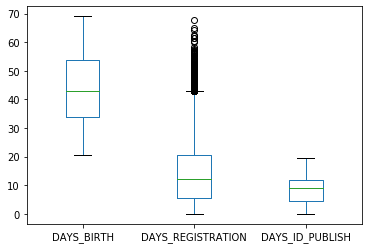

In [69]:
(df_temp[['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_ID_PUBLISH']]/-365).plot.box()

In [70]:
df_temp.loc[np.abs(df_temp['DAYS_EMPLOYED'])> 20000,'DAYS_EMPLOYED']=np.nan

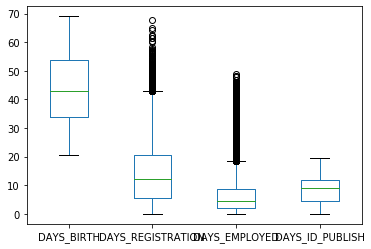

In [71]:
(df_temp[['DAYS_BIRTH','DAYS_REGISTRATION','DAYS_EMPLOYED','DAYS_ID_PUBLISH']]/-365).plot.box()

In [80]:
# Normalizing the numerical columns & then computing their variances
df_temp1 = (df_temp/df_temp.mean()).var()

In [77]:
# Binning the variances of different normalized numerical columns into various intervals
df_temp2 = pd.cut(df_temp1,bins=[0,.999999,1,1.5,2,2.5,3,np.inf])

In [78]:
df_temp2.value_counts()

(3.0, inf]         61
(0.0, 0.999999]    56
(2.5, 3.0]         16
(1.0, 1.5]          9
(1.5, 2.0]          6
(2.0, 2.5]          4
(0.999999, 1.0]     0
dtype: int64

In [85]:
# Removing the numerical columns that have variance less than 1
df_temp2 = df_temp1.loc[df_temp1 < 1 ]
cols_to_remove = df_temp2.index
X_train.drop(columns=cols_to_remove,inplace=True)

In [86]:
# Removing same coulmns from the holdout set
X_holdout.drop(columns=cols_to_remove,inplace=True)

In [87]:
# Checking for integrity of no. of columns of both Training & Holdout dataset
print('No. of columns in X_train are: ',X_train.shape[1])
print('No. of columns in X_holdout are: ',X_holdout.shape[1])

No. of columns in X_train are:  107
No. of columns in X_holdout are:  107
